# Fourier Examples

## Introduction

Fourier series can be used to represent periodic functions as a sum of sine and cosine terms with different amplitudes and freqencies. For example, a function $f(t)$, with period $T$, can be written:

\begin{eqnarray}
\begin{array}{c}
f(t) = {a_0} + \sum\limits_{n = 1}^\infty  {{a_n}\cos \left( {\frac{{2n\pi t}}{T}} \right) + {b_n}\sin \left( {\frac{{2n\pi t}}{T}} \right).}
\end{array}
\end{eqnarray}

The coefficients $a_0$, $a_n$ and $b_n$ may be determined as follows:

\begin{eqnarray}
\begin{array}{c}
\begin{aligned}
{a_0} &= \frac{1}{T}\int\limits_0^T {f(t)\,dt} \\
{a_n} &= \frac{2}{T}\int\limits_0^T {f(t)\cos \left( {\frac{{2n\pi t}}{T}} \right)\,dt} \\
{b_n} &= \frac{2}{T}\int\limits_0^T {f(t)\sin \left( {\frac{{2n\pi t}}{T}} \right)\,dt}. 
\end{aligned}
\end{array}
\end{eqnarray}

The function here is:

\begin{eqnarray}
\begin{array}{c}
\begin{aligned}
f(t) &= 20t\,\,{\rm{ if}}\,\,{\rm{ }} 0 < t <  0.1,\\
     &= 2\,\,{\rm{ if}}\,\,{\rm{ }} 0.1 < t < 0.2,\\
     &= 6 - 20t\,\,{\rm{ if}}\,\,{\rm{ }} 0.2 < t  < 0.3.
\end{aligned}
\end{array}
\end{eqnarray}

We have $T = 0.3$. The graph of $f(t)$, shown below, is the same as that above.

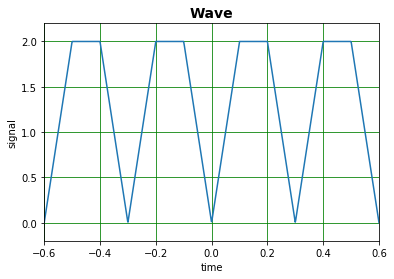

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import cm
import sympy as sp
from IPython.display import display, Markdown, Latex
#
# define the flat triangle function
def FlatTri(t, T):
    '''
    Flat triangle function centered on zero with period T
    '''
    lArr = len(t)
    Tarr = 2*T*np.ones(lArr)
    arg = t - ((t - T)//(2*T))*2*T - 2*T
    boolA = np.logical_and(-3*Tarr/(3*2) < arg, arg < -2*Tarr/(3*2))
    boolB = np.logical_and(-2*Tarr/(3*2) < arg, arg < -1*Tarr/(3*2))
    boolC = np.logical_and(-1*Tarr/(3*2) < arg, arg < 0*Tarr/(3*2))
    boolD = np.logical_and(0*Tarr/(3*2) < arg, arg < 1*Tarr/(3*2))
    boolE = np.logical_and(1*Tarr/(3*2) < arg, arg < 2*Tarr/(3*2))
    boolF = np.logical_and(2*Tarr/(3*2) < arg, arg < 3*Tarr/(3*2))
    fA = 6 + 20*arg
    fB = 2*np.ones(lArr)
    fC = -20*arg
    fD = 20*arg
    fE = 2*np.ones(lArr)
    fF = 6 - 20*arg
    #
    f = boolA*fA + boolB*fB + boolC*fC + boolD*fD + boolE*fE + boolF*fF
    #
    return f
#
T = 0.3
nT = 1000
tBot = -0.6
tTop = 0.6
tArr = np.linspace(tBot, tTop, nT)
fArr = np.zeros(nT)
fArr = FlatTri(tArr, T)
plt.plot(tArr, fArr)
plt.title("Wave", size = 14, weight = "bold")
plt.xlabel("time")
plt.ylabel("signal")
plt.axis([tBot, tTop, -0.2, 2.2])
plt.grid(color = 'g')
plt.savefig("FlatTriangle.png")

Calculate $a_0$:

In [2]:
t = sp.Symbol("t")
a0 = 1/T*(sp.integrate(20*t, (t, 0.0, 0.1)) + sp.integrate(2, (t, 0.1, 0.2)) + 
          sp.integrate(6 - 20*t, (t, 0.2, 0.3)))
display(Markdown("$a_0 = " + sp.latex(a0) + "$"))

$a_0 = 1.33333333333333$

Determine the expression for the $a_n$:

In [3]:
n = sp.Symbol("n")
an = 2/T*(sp.integrate(20*t*sp.cos(2*n*sp.pi*t/T), (t, 0.0, 0.1)) + 
          sp.integrate(2*sp.cos(2*n*sp.pi*t/T), (t, 0.1, 0.2)) + 
          sp.integrate((6 - 20*t)*sp.cos(2*n*sp.pi*t/T), (t, 0.2, 0.3)))
display(Markdown("$a_n = " + sp.latex(sp.simplify(an)) + "$"))

$a_n = \begin{cases} \frac{4.44089209850063 \cdot 10^{-16} \sin{\left (0.666666666666667 \pi n \right )} + 4.44089209850063 \cdot 10^{-16} \sin{\left (1.33333333333333 \pi n \right )} + 7.40148683083438 \cdot 10^{-16} \sin{\left (2.0 \pi n \right )} + \frac{3.0 \cos{\left (0.666666666666667 \pi n \right )}}{\pi n} + \frac{3.0 \cos{\left (1.33333333333333 \pi n \right )}}{\pi n} - \frac{3.0 \cos{\left (2.0 \pi n \right )}}{\pi n} - \frac{3.0}{\pi n}}{\pi n} & \text{for}\: n > -\infty \wedge n < \infty \wedge n \neq 0 \\2.66666666666667 & \text{otherwise} \end{cases}$

Check that the $b_n$ are zero (which is the case even though sympy doesn't recognise this because of precision issues!):

In [4]:
bn = 2/T*(sp.integrate(20*t*sp.sin(2*n*sp.pi*t/T), (t, 0.0, 0.1)) + 
          sp.integrate(2*sp.sin(2*n*sp.pi*t/T), (t, 0.1, 0.2)) + 
          sp.integrate((6 - 20*t)*sp.sin(2*n*sp.pi*t/T), (t, 0.2, 0.3)))
display(Markdown("$b_n = " + sp.latex(sp.simplify(bn)) + "$"))

$b_n = \begin{cases} \frac{- 4.44089209850063 \cdot 10^{-16} \cos{\left (0.666666666666667 \pi n \right )} - 4.44089209850063 \cdot 10^{-16} \cos{\left (1.33333333333333 \pi n \right )} - 7.40148683083438 \cdot 10^{-16} \cos{\left (2.0 \pi n \right )} + \frac{3.0 \sin{\left (0.666666666666667 \pi n \right )}}{\pi n} + \frac{3.0 \sin{\left (1.33333333333333 \pi n \right )}}{\pi n} - \frac{3.0 \sin{\left (2.0 \pi n \right )}}{\pi n}}{\pi n} & \text{for}\: n > -\infty \wedge n < \infty \wedge n \neq 0 \\0 & \text{otherwise} \end{cases}$

Work out the values of the coefficients and plot the sum of the Fourier Series.

 
Fourier coefficients for flat triangle.
n	 an
0	 1.333333
1	 -0.911891
2	 -0.227973
3	 0.000000
4	 -0.056993
5	 -0.036476
6	 0.000000
7	 -0.018610
8	 -0.014248
9	 0.000000
10	 -0.009119
11	 -0.007536
12	 0.000000
13	 -0.005396
14	 -0.004653
15	 0.000000
16	 -0.003562
17	 -0.003155
18	 0.000000
19	 -0.002526
 


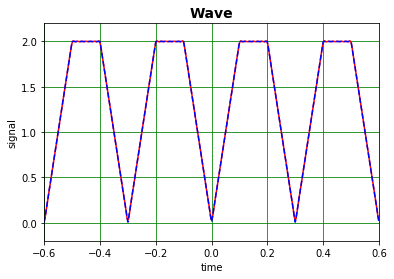

In [10]:
def coeffFlatTriA(N, T):
    '''
    Fourier coefficients for flat triangle. 
    '''
    a = np.zeros(N)
    b = np.zeros(N)
    a[0] = 4/3
    for n in range(1, N):
        a[n] = (3*np.cos(2*np.pi*n/3) + 3*np.cos(4*np.pi*n/3) - 
                3*np.cos(2*np.pi*n) - 3)/(np.pi**2*n**2)
    return a, b
#
def fsSum(a, b, N, T, t):
    '''
    Sum of Fourier Series
    '''
    F = a[0]
    for n in range(1, N):
        F = F + a[n]*np.cos(2*n*np.pi*t/T) + b[n]*np.sin(2*n*np.pi*t/T)
    return F
#
N = 20
caFlatTriA, cbFlatTriA = coeffFlatTriA(N, T)
np.set_printoptions(precision = 2)
print(" ")
print("Fourier coefficients for flat triangle.") 
print("n\t an")
for n in range(0, N):
    print("{:d}\t {:.6f}".format(n, caFlatTriA[n]))
#
tArrS = np.linspace(tBot, tTop, nT)
fArrS = np.zeros(nT)
for i in range(0, nT):
    fArrS[i] = fsSum(caFlatTriA, cbFlatTriA, N, T, tArr[i])
print(" ")
plt.plot(tArrS, fArrS, color = 'r', linestyle = '-')
plt.plot(tArr, fArr, color = 'b', linestyle = '--')
plt.title("Wave", size = 14, weight = "bold")
plt.xlabel("time")
plt.ylabel("signal")
plt.axis([tBot, tTop, -0.2, 2.2])
plt.grid(color = 'g')
plt.savefig("FlatTriFourierA.png")